In [1]:
import os
import sys
from pathlib import Path

sys.path.append(str(Path().resolve().parent))
sys.path.append(str(Path().resolve().parent.parent))

import numpy as np
import pandas as pd
import json

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt

from shapely.geometry import Point

In [3]:
geoDatav = gpd.read_file('https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/US-counties.geojson')

In [4]:
df = pd.read_csv("/network/projects/_groups/ecosystem-embeddings/hotspot_split_june/hotspots_june_filtered.csv")
geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)   


In [5]:
train = pd.read_csv("/network/scratch/t/tengmeli/scratch/ecosystem-embedding/training/train_clustered_vf.csv")
val = pd.read_csv("/network/scratch/t/tengmeli/scratch/ecosystem-embedding/training/valid_clustered_vf.csv")
test = pd.read_csv("/network/scratch/t/tengmeli/scratch/ecosystem-embedding/training/test_clustered_vf.csv")
gdf["split"] = ""


In [6]:
idx = gdf[gdf["hotspot_id"].isin(list(train["hotspot"]))].index
gdf.loc[idx,"split"] = "train"

idx = gdf[gdf["hotspot_id"].isin(list(val["hotspot"]))].index
gdf.loc[idx,"split"] = "val"
idx = gdf[gdf["hotspot_id"].isin(list(test["hotspot"]))].index
gdf.loc[idx,"split"] = "test"

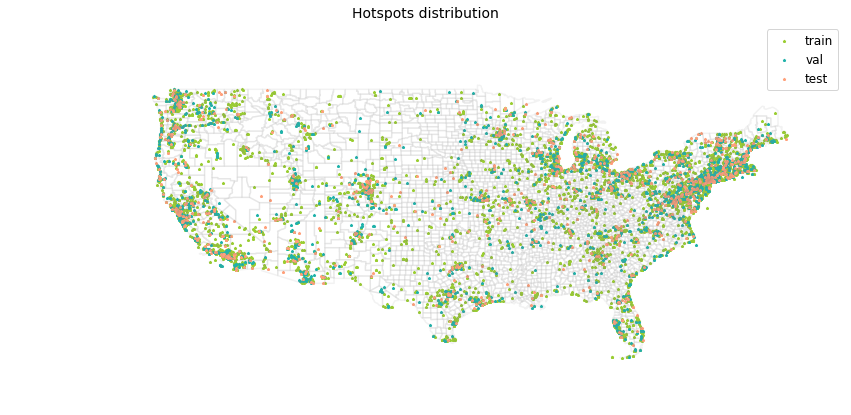

In [24]:
fig, ax = plt.subplots(figsize =(15,10))
#train_gdf.drop_duplicates(["geometry"]).boundary.plot(ax = ax, alpha = 0.4, edgecolor = "gray")
geoDatav[~geoDatav["STATE"].isin(["02", "15"])].boundary.plot(ax=ax, alpha = 0.1, edgecolor = "gray" )
gdf[gdf["split"]=="train"].plot(ax=ax,marker='*', color='yellowgreen', markersize=6, label = "train")
gdf[gdf["split"]=="val"].plot(ax=ax, marker='*', color='lightseagreen', markersize=6, label = "val")
gdf[gdf["split"]=="test"].plot(ax=ax, marker='*', color='lightsalmon', markersize=6, label = "test")
ax.set_ylim(top=55, bottom=20)
plt.axis('off')
#fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.legend(prop={'size':12})
plt.title("Hotspots distribution", fontsize=14)

plt.show()



In [25]:
plt.savefig("hotspots_final.png")

<Figure size 432x288 with 0 Axes>

In [7]:
import numpy as np

In [8]:
with open("/network/projects/_groups/ecosystem-embeddings/species_splits/species_list.txt") as f:
    species = [i.strip("\n") for i in f.readlines()]

In [9]:
non_songbird_idx = np.load("/network/projects/_groups/ecosystem-embeddings/species_splits/not_songbirds_idx.npy")


In [10]:
idx_species = 338
name_species = np.array(species)[non_songbird_idx][idx_species]
name_species

'Spatula cyanoptera'

In [11]:


gdf[name_species] = ""
gdf[name_species + " pred"] = ""

path_gt = "/network/scratch/t/tengmeli/scratch/ecosystem-embedding/ebird_data_june/"

path_pred = "/network/projects/_groups/ecosystem-embeddings/ebird_checkpoints/resnet18_location_300_epochs/preds"

sub= gdf[gdf["split"].isin(["train","val"])]

for index, row in gdf.iterrows():
    if row["split"] in ["train", "val"]:
        gdf[name_species + " pred"][index] = np.load(os.path.join(path_pred, gdf["hotspot_id"][index] + ".npy"))[idx_species]
        with open(os.path.join(path_gt, gdf["hotspot_id"][index] + ".json")) as f:
            data=np.array(json.load(f)["probs"])[non_songbird_idx][idx_species]
        gdf[name_species][index] = data


/home/mila/t/tengmeli/.conda/envs/glc/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/home/mila/t/tengmeli/.conda/envs/glc/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [12]:
sub= gdf[gdf["split"].isin(["train","val"])]

In [13]:
val= gdf[gdf["split"].isin(["val"])]

In [20]:
high_duck =sub.sort_values("Spatula cyanoptera", ascending=False)[:8]

In [21]:
def centercrop(rgb):
    im = Image.fromarray(np.transpose(rgb, (1,2,0)))
    width, height = im.size   # Get dimensions
    new_width = 256
    new_height = 256
    left = (width - new_width)/2
    top = (height - new_height)/2
    right = (width + new_width)/2
    bottom = (height + new_height)/2

    # Crop the center of the image
    im = im.crop((left, top, right, bottom))
    return(im)

In [32]:
high_duck = high_duck.reset_index()

In [54]:
from PIL import Image, ImageDraw, ImageFont

In [43]:
image_editable = ImageDraw.Draw(im)
image_editable.text((25,240), "ttt", (255,0,0))

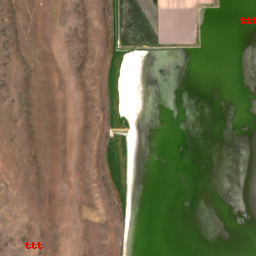

In [44]:
im

In [64]:
font = ImageFont.load_default()

In [72]:
font.getsize("aaa")

(18, 11)

In [ ]:
ImageDraw.Draw.tex

In [128]:
def write_text(im, title_text, pos = (25,220), color = (255, 51, 239)):
    font = ImageFont.load_default()
    
    font = ImageFont.truetype("./arial.ttf", 24)
    image_editable = ImageDraw.Draw(im)
    image_editable.text(pos, title_text, color, font=font)
    return (im)

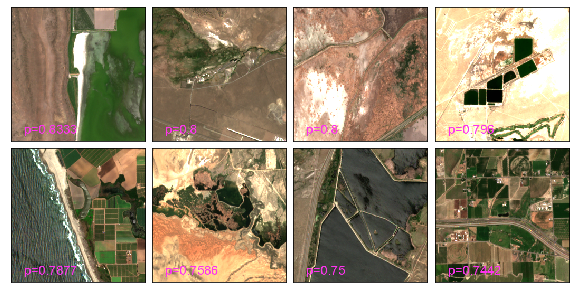

In [116]:
# https://matplotlib.org/mpl_toolkits/axes_grid/users/overview.html
from mpl_toolkits.axes_grid1 import ImageGrid
fig = plt.figure(1,(10,10))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(2,4),
                 axes_pad=0.1,
                 share_all=True
                 )
grid[0].get_yaxis().set_ticks([])
grid[0].get_xaxis().set_ticks([])
#"Sample locations with high presence of "+name_species
#plt.subplots_adjust(top=0.85)
for index, row in high_duck.iterrows():
    rgb = np.load(os.path.join("/network/scratch/t/tengmeli/scratch/ecosystem-embedding/satellite_data/", row["hotspot_id"] +"_rgb.npy"))
    im = centercrop(rgb)
    im=write_text(im, "p=" + str(round(row[name_species], 4)))
    image =np.array(im)    
    grid[index].imshow(image,interpolation='none')


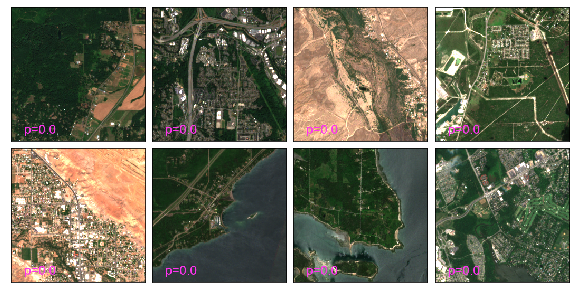

In [121]:
low_duck = sub.sort_values("Spatula cyanoptera", ascending=False)[-8:]
low_duck = low_duck.reset_index()

# https://matplotlib.org/mpl_toolkits/axes_grid/users/overview.html

from mpl_toolkits.axes_grid1 import ImageGrid
fig = plt.figure(1,(10,10))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(2,4),
                 axes_pad=0.1,
                 share_all=True
                 )
grid[0].get_yaxis().set_ticks([])
grid[0].get_xaxis().set_ticks([])
#"Sample locations with high presence of "+name_species
#plt.subplots_adjust(top=0.85)
for index, row in low_duck.iterrows():
    rgb = np.load(os.path.join("/network/scratch/t/tengmeli/scratch/ecosystem-embedding/satellite_data/", row["hotspot_id"] +"_rgb.npy"))
    im = centercrop(rgb)
    im=write_text(im, "p=" + str(round(row[name_species], 4)))
    image =np.array(im)    
    grid[index].imshow(image,interpolation='none')

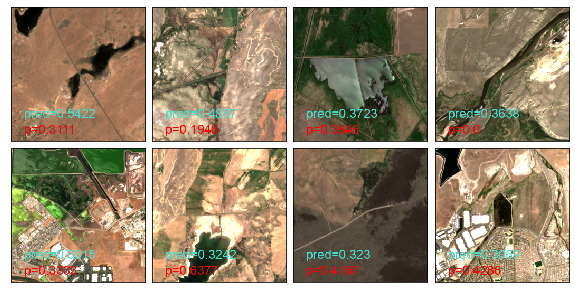

In [131]:
sub_val = sub[sub["split"]=="val"]
high_duck_pred = sub_val.sort_values("Spatula cyanoptera pred", ascending=False)[:8]
high_duck_pred = high_duck_pred.reset_index()

# https://matplotlib.org/mpl_toolkits/axes_grid/users/overview.html

from mpl_toolkits.axes_grid1 import ImageGrid
fig = plt.figure(1,(10,10))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(2,4),
                 axes_pad=0.1,
                 share_all=True
                 )
grid[0].get_yaxis().set_ticks([])
grid[0].get_xaxis().set_ticks([])
#"Sample locations with high presence of "+name_species
#plt.subplots_adjust(top=0.85)
for index, row in high_duck_pred.iterrows():
    rgb = np.load(os.path.join("/network/scratch/t/tengmeli/scratch/ecosystem-embedding/satellite_data/", row["hotspot_id"] +"_rgb.npy"))
    im = centercrop(rgb)
    im=write_text(im, "p=" + str(round(row[name_species], 4)), color = (255, 0,0))
    im = write_text(im, "pred=" + str(round(row[name_species + " pred"], 4)), pos = (25,190), color = (64, 224, 208))
    image =np.array(im)    
    grid[index].imshow(image,interpolation='none')

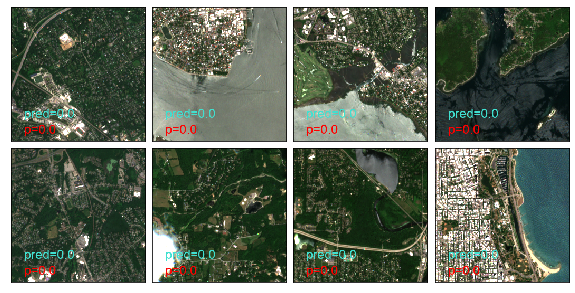

In [132]:
sub_val = sub[sub["split"]=="val"]
high_duck_pred = sub_val.sort_values("Spatula cyanoptera pred", ascending=True)[:8]
high_duck_pred = high_duck_pred.reset_index()

# https://matplotlib.org/mpl_toolkits/axes_grid/users/overview.html

from mpl_toolkits.axes_grid1 import ImageGrid
fig = plt.figure(1,(10,10))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(2,4),
                 axes_pad=0.1,
                 share_all=True
                 )
grid[0].get_yaxis().set_ticks([])
grid[0].get_xaxis().set_ticks([])
#"Sample locations with high presence of "+name_species
#plt.subplots_adjust(top=0.85)
for index, row in high_duck_pred.iterrows():
    rgb = np.load(os.path.join("/network/scratch/t/tengmeli/scratch/ecosystem-embedding/satellite_data/", row["hotspot_id"] +"_rgb.npy"))
    im = centercrop(rgb)
    im=write_text(im, "p=" + str(round(row[name_species], 4)), color = (255, 0,0))
    im = write_text(im, "pred=" + str(round(row[name_species + " pred"], 4)), pos = (25,190), color = (64, 224, 208))
    image =np.array(im)    
    grid[index].imshow(image,interpolation='none')

In [ ]:
# https://matplotlib.org/mpl_toolkits/axes_grid/users/overview.html
from mpl_toolkits.axes_grid1 import ImageGrid
fig = plt.figure(1,(10,10))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(2,4),
                 axes_pad=0.1,
                 share_all=True
                 )
grid[0].get_yaxis().set_ticks([])
grid[0].get_xaxis().set_ticks([])
#"Sample locations with high presence of "+name_species
#plt.subplots_adjust(top=0.85)
for index, row in high_duck.iterrows():
    rgb = np.load(os.path.join("/network/scratch/t/tengmeli/scratch/ecosystem-embedding/satellite_data/", row["hotspot_id"] +"_rgb.npy"))
    im = centercrop(rgb)
    im=write_text(im, "p=" + str(round(row[name_species], 4)))
    image =np.array(im)    
    grid[index].imshow(image,interpolation='none')

In [85]:
val[val["Spatula cyanoptera"]>0.6]

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1 hotspot_id         lon  \
335          335           335             335    L818547 -110.194073   
922          922           922             922    L373417 -121.720000   
3170        3170          3170            3170   L1088266 -122.990302   
3618        3618          3618            3618    L493044 -123.346124   
4315        4315          4315            4315    L753048 -118.887563   
7420        7420          7420            7420   L3429881 -118.857951   
7846        7846          7846            7846    L737396 -107.935395   
7883        7883          7883            7883   L2342351 -118.854089   

            lat      county county_code       state state_code  ...  \
335   34.919438      Navajo   US-AZ-017     Arizona      US-AZ  ...   
922   41.948000    Siskiyou   US-CA-093  California      US-CA  ...   
3170  45.513001  Washington   US-OR-067      Oregon      US-OR  ...   
3618  44.520132      Benton   US-OR-003      Oregon      US-OR  ...   
4315  43.202486      Harney   US-OR-025      Oregon      US-OR  ...   
7420  37.639638        Mono   US-CA-051  California      US-CA  ...   
7846  38.842233       Delta   US-CO-029    Colorado      US-CO  ...   
7883  43.238598      Harney   US-OR-025      Oregon      US-OR  ...   

                         geometry  split  Accipiter cooperii  \
335   POINT (-110.19407 34.91944)    val                   0   
922   POINT (-121.72000 41.94800)    val                   0   
3170  POINT (-122.99030 45.51300)    val            0.166667   
3618  POINT (-123.34612 44.52013)    val          0.00377358   
4315  POINT (-118.88756 43.20249)    val                   0   
7420  POINT (-118.85795 37.63964)    val                   0   
7846  POINT (-107.93540 38.84223)    val                   0   
7883  POINT (-118.85409 43.23860)    val                   0   

      Accipiter cooperii pred  Aegolius acadicus Aegolius acadicus pred  \
335                0.00864245                  0            2.88761e-06   
922                0.00369869                  0             0.00036652   
3170               0.00964988                  0            6.09366e-06   
3618               0.00108337                  0            3.36933e-07   
4315               0.00816556                  0            1.94877e-05   
7420                0.0255171                  0            0.000387847   
7846               0.00827499                  0            8.58681e-05   
7883                0.0012904                  0            1.24761e-05   

     Anas rubripes Anas rubripes pred Spatula cyanoptera  \
335              0         2.5234e-06           0.636364   
922              0        9.36214e-07                0.8   
3170             0        1.27925e-07           0.666667   
3618             0        6.97385e-06           0.607547   
4315             0        3.42334e-07           0.666667   
7420             0        3.35538e-07                0.8   
7846             0        2.31889e-05           0.637681   
7883             0        1.24373e-05           0.642857   

     Spatula cyanoptera pred  
335                0.0115485  
922                 0.212612  
3170              0.00108655  
3618                0.103756  
4315              0.00270587  
7420               0.0519678  
7846                 0.32423  
7883               0.0981228  

[8 rows x 25 columns]

In [69]:
hs1 = "L737396"
hs2 = "L2342351"

In [71]:
from PIL import Image

In [ ]:
def centercrop(rgb):
    im = Image.fromarray(np.transpose(rgb, (1,2,0)))
    width, height = im.size   # Get dimensions
    new_width = 256
    new_height = 256
    left = (width - new_width)/2
    top = (height - new_height)/2
    right = (width + new_width)/2
    bottom = (height + new_height)/2

    # Crop the center of the image
    im = im.crop((left, top, right, bottom))
    return(im)

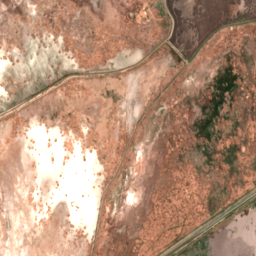

In [86]:
rgb = np.load("/network/scratch/t/tengmeli/scratch/ecosystem-embedding/satellite_data/L373417_rgb.npy")



im

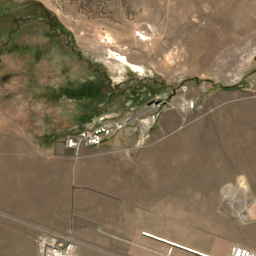

In [87]:
rgb = np.load("/network/scratch/t/tengmeli/scratch/ecosystem-embedding/satellite_data/L3429881_rgb.npy")

im = Image.fromarray(np.transpose(rgb, (1,2,0)))
width, height = im.size   # Get dimensions
new_width = 256
new_height = 256
left = (width - new_width)/2
top = (height - new_height)/2
right = (width + new_width)/2
bottom = (height + new_height)/2

# Crop the center of the image
im = im.crop((left, top, right, bottom))

im

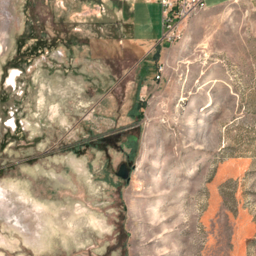

In [90]:
rgb = np.load("/network/scratch/t/tengmeli/scratch/ecosystem-embedding/satellite_data/L501746_rgb.npy")

im = Image.fromarray(np.transpose(rgb, (1,2,0)))
width, height = im.size   # Get dimensions
new_width = 256
new_height = 256
left = (width - new_width)/2
top = (height - new_height)/2
right = (width + new_width)/2
bottom = (height + new_height)/2

# Crop the center of the image
im = im.crop((left, top, right, bottom))

im

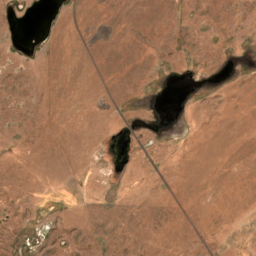

In [91]:
rgb = np.load("/network/scratch/t/tengmeli/scratch/ecosystem-embedding/satellite_data/L265651_rgb.npy")

im = Image.fromarray(np.transpose(rgb, (1,2,0)))
width, height = im.size   # Get dimensions
new_width = 256
new_height = 256
left = (width - new_width)/2
top = (height - new_height)/2
right = (width + new_width)/2
bottom = (height + new_height)/2

# Crop the center of the image
im = im.crop((left, top, right, bottom))

im

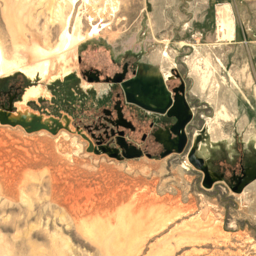

In [99]:
#training examples  
#L1792259
#L109301
#L7209244
#/L7202022
rgb = np.load("/network/scratch/t/tengmeli/scratch/ecosystem-embedding/satellite_data/L7209244_rgb.npy")

im = Image.fromarray(np.transpose(rgb, (1,2,0)))
width, height = im.size   # Get dimensions
new_width = 256
new_height = 256
left = (width - new_width)/2
top = (height - new_height)/2
right = (width + new_width)/2
bottom = (height + new_height)/2

# Crop the center of the image
im = im.crop((left, top, right, bottom))

im

In [89]:
val[val["Spatula cyanoptera pred"]>0.4]

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1 hotspot_id         lon  \
5786        5786          5786            5786    L501746 -111.856270   
8566        8566          8566            8566    L265651 -117.911059   

           lat   county county_code       state state_code  ...  \
5786  39.96278     Utah   US-UT-049        Utah      US-UT  ...   
8566  47.23036  Whitman   US-WA-075  Washington      US-WA  ...   

                         geometry  split  Accipiter cooperii  \
5786  POINT (-111.85627 39.96278)    val                   0   
8566  POINT (-117.91106 47.23036)    val                   0   

      Accipiter cooperii pred  Aegolius acadicus Aegolius acadicus pred  \
5786               0.00189944                  0            0.000230288   
8566               0.00578828                  0            0.000681281   

     Anas rubripes Anas rubripes pred Spatula cyanoptera  \
5786             0        7.39271e-06           0.194805   
8566             0         5.8856e-05           0.311111   

     Spatula cyanoptera pred  
5786                0.488716  
8566                0.542173  

[2 rows x 25 columns]

In [56]:
sub[sub["Anas rubripes"]> 0.5]

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1 hotspot_id        lon  \
1720        1720          1720            1720    L446894 -75.889606   
3912        3912          3912            3912    L954555 -73.822460   
4148        4148          4148            4148   L1138512 -70.280914   
5631        5631          5631            5631    L596414 -75.013361   
7345        7345          7345            7345    L955942 -73.122994   
7517        7517          7517            7517    L612612 -74.096083   

            lat        county county_code        state state_code  ...  \
1720  38.174782      Somerset   US-MD-039     Maryland      US-MD  ...   
3912  40.617210        Queens   US-NY-081     New York      US-NY  ...   
4148  43.647426    Cumberland   US-ME-005        Maine      US-ME  ...   
5631  44.930901  St. Lawrence   US-NY-089     New York      US-NY  ...   
7345  41.188884     Fairfield   US-CT-001  Connecticut      US-CT  ...   
7517  40.664925        Hudson   US-NJ-017   New Jersey      US-NJ  ...   

      num_different_species  state_id                    geometry  split  \
1720                    224        19  POINT (-75.88961 38.17478)  train   
3912                    218        33  POINT (-73.82246 40.61721)  train   
4148                     97        20  POINT (-70.28091 43.64743)  train   
5631                    146        33  POINT (-75.01336 44.93090)    val   
7345                    115         6  POINT (-73.12299 41.18888)  train   
7517                    176        30  POINT (-74.09608 40.66493)  train   

      Accipiter cooperii Accipiter cooperii pred Aegolius acadicus  \
1720                   0              0.00128087                 0   
3912                   0              0.00142495                 0   
4148                   0             0.000655647                 0   
5631                   0               0.0168989                 0   
7345                   0              8.4263e-05                 0   
7517                   0              0.00224858                 0   

     Aegolius acadicus pred Anas rubripes Anas rubripes pred  
1720            5.30221e-06      0.571429            0.58557  
3912            1.64935e-06          0.64            0.73784  
4148            1.35844e-07      0.666667           0.855561  
5631            0.000432963      0.533333           0.107032  
7345            2.03595e-08           0.8           0.963833  
7517            1.76398e-06      0.688889           0.781989  

[6 rows x 23 columns]

In [101]:
sub

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1 hotspot_id         lon  \
0              0             0               0   L8838283  -84.385593   
1              1             1               1   L1184986  -89.344747   
2              2             2               2   L2626716 -122.840409   
3              3             3               3    L575194  -72.524126   
4              4             4               4    L925049  -76.630036   
...          ...           ...             ...        ...         ...   
8633        8633          8633            8633   L2146581 -123.084710   
8634        8634          8634            8634    L283109  -90.417566   
8635        8635          8635            8635    L513743  -75.411090   
8636        8636          8636            8636    L522347 -121.765240   
8637        8637          8637            8637   L2172287  -77.128787   

            lat       county county_code          state state_code  ...  \
0     33.994190       Fulton   US-GA-121        Georgia      US-GA  ...   
1     41.879627          Lee   US-IL-103       Illinois      US-IL  ...   
2     45.735062     Columbia   US-OR-009         Oregon      US-OR  ...   
3     42.590658     Franklin   US-MA-011  Massachusetts      US-MA  ...   
4     39.321150    Baltimore   US-MD-005       Maryland      US-MD  ...   
...         ...          ...         ...            ...        ...  ...   
8633  39.002042    Mendocino   US-CA-045     California      US-CA  ...   
8634  38.893171  St. Charles   US-MO-183       Missouri      US-MO  ...   
8635  39.812253     Delaware   US-PA-045   Pennsylvania      US-PA  ...   
8636  36.572932     Monterey   US-CA-053     California      US-CA  ...   
8637  38.713644      Fairfax   US-VA-059       Virginia      US-VA  ...   

                         geometry  split  Accipiter cooperii  \
0      POINT (-84.38559 33.99419)  train                   0   
1      POINT (-89.34475 41.87963)    val                   0   
2     POINT (-122.84041 45.73506)  train                   0   
3      POINT (-72.52413 42.59066)  train           0.0769231   
4      POINT (-76.63004 39.32115)    val                   0   
...                           ...    ...                 ...   
8633  POINT (-123.08471 39.00204)  train            0.121495   
8634   POINT (-90.41757 38.89317)  train           0.0731707   
8635   POINT (-75.41109 39.81225)  train                   0   
8636  POINT (-121.76524 36.57293)  train            0.111111   
8637   POINT (-77.12879 38.71364)    val            0.111111   

      Accipiter cooperii pred  Aegolius acadicus Aegolius acadicus pred  \
0                 0.000308142                  0            2.97205e-08   
1                   0.0205024                  0            1.80477e-05   
2                 0.000360872                  0            1.95452e-06   
3                   0.0512372                  0            4.88057e-06   
4                   0.0173074                  0            3.06035e-07   
...                       ...                ...                    ...   
8633                0.0914957                  0            9.06591e-05   
8634                0.0398398                  0             3.1062e-05   
8635              0.000354663                  0            1.75018e-07   
8636                0.0802163                  0            2.22031e-06   
8637                0.0452042                  0            2.58784e-06   

     Anas rubripes Anas rubripes pred Spatula cyanoptera  \
0                0        0.000238351                  0   
1                0         1.7413e-05                  0   
2                0        2.75208e-08                  0   
3                0        0.000122981                  0   
4                0          0.0016724                  0   
...            ...                ...                ...   
8633             0        7.89133e-07                  0   
8634             0        0.000940302                  0   
8635             0

TypeError: loop of ufunc does not support argument 0 of type numpy.float64 which has no callable sqrt method

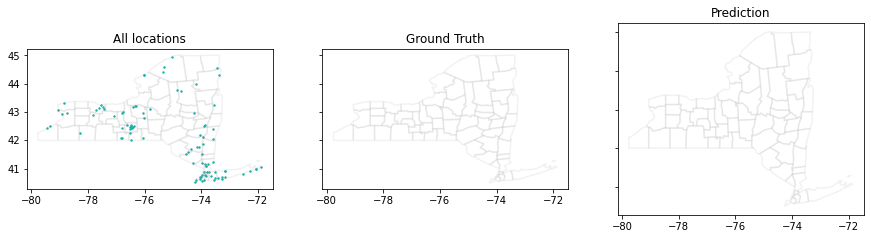

In [100]:
#California
ig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,15))
ax1.set_title('All locations')
ax2.set_title('Ground Truth')
ax3.set_title('Prediction')
#train_gdf.drop_duplicates(["geometry"]).boundary.plot(ax = ax, alpha = 0.4, edgecolor = "gray")
geoDatav[geoDatav["STATE"].isin(["36"])].boundary.plot(ax=ax1, alpha = 0.1, edgecolor = "gray" )

geoDatav[geoDatav["STATE"].isin(["36"])].boundary.plot(ax=ax2, alpha = 0.1, edgecolor = "gray" )

geoDatav[geoDatav["STATE"].isin(["36"])].boundary.plot(ax=ax3, alpha = 0.1, edgecolor = "gray" )

sub_cali = sub[sub["state_code"]=="US-NY"]
#sub_train = sub_cali[sub_cali["split"]=="train"]
sub_val = sub_cali[sub_cali["split"]=="val"]
#sub.plot(ax=ax,markersize= sub['Accipiter cooperii']*50)
#sub_train.plot(ax=ax1,markersize= sub_train['Accipiter cooperii']*70)
sub_val.plot(ax=ax1,markersize= 2, color="lightseagreen")
sub_val.plot(ax=ax2,markersize= sub_val['Spatula cyanoptera pred']*100, color="lightseagreen")
#sub_train.plot(ax=ax2,markersize= sub_train['Accipiter cooperii pred']*70)

sub_val.plot(ax=ax3,markersize= sub_val['Spatula cyanoptera']*100, color="lightseagreen")

plt.show()

In [ ]:

sub["Accipiter cooperii"] = sub["Accipiter cooperii"].astype(float)
sub['Accipiter cooperii pred'] = sub['Accipiter cooperii pred'].astype(float)

ig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(17,12))

#train_gdf.drop_duplicates(["geometry"]).boundary.plot(ax = ax, alpha = 0.4, edgecolor = "gray")
geoDatav[~geoDatav["STATE"].isin(["02", "15"])].boundary.plot(ax=ax1, alpha = 0.1, edgecolor = "gray" )

geoDatav[~geoDatav["STATE"].isin(["02", "15"])].boundary.plot(ax=ax2, alpha = 0.1, edgecolor = "gray" )

#sub.plot(ax=ax,markersize= sub['Accipiter cooperii']*50)
sub.plot(ax=ax1,markersize= sub['Accipiter cooperii']*50)
a = sub['Accipiter cooperii pred'].copy()
a[a <  10e-6] = 0
sub.plot(ax=ax2,markersize= a*50)
plt.show()

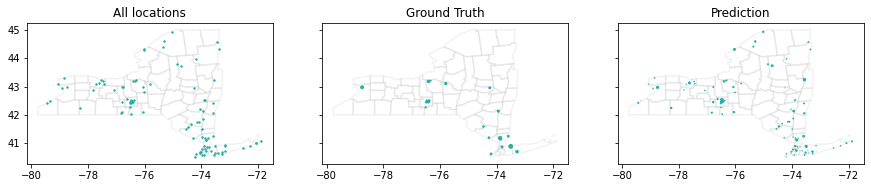

In [86]:
#California
ig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,15))
ax1.set_title('All locations')
ax2.set_title('Ground Truth')
ax3.set_title('Prediction')
#train_gdf.drop_duplicates(["geometry"]).boundary.plot(ax = ax, alpha = 0.4, edgecolor = "gray")
geoDatav[geoDatav["STATE"].isin(["36"])].boundary.plot(ax=ax1, alpha = 0.1, edgecolor = "gray" )

geoDatav[geoDatav["STATE"].isin(["36"])].boundary.plot(ax=ax2, alpha = 0.1, edgecolor = "gray" )

geoDatav[geoDatav["STATE"].isin(["36"])].boundary.plot(ax=ax3, alpha = 0.1, edgecolor = "gray" )

sub_cali = sub[sub["state_code"]=="US-NY"]
#sub_train = sub_cali[sub_cali["split"]=="train"]
sub_val = sub_cali[sub_cali["split"]=="val"]
#sub.plot(ax=ax,markersize= sub['Accipiter cooperii']*50)
#sub_train.plot(ax=ax1,markersize= sub_train['Accipiter cooperii']*70)
sub_val.plot(ax=ax1,markersize= 2, color="lightseagreen")
sub_val.plot(ax=ax2,markersize= sub_val['Accipiter cooperii pred']*100, color="lightseagreen")
#sub_train.plot(ax=ax2,markersize= sub_train['Accipiter cooperii pred']*70)

sub_val.plot(ax=ax3,markersize= sub_val['Accipiter cooperii']*100, color="lightseagreen")

plt.show()

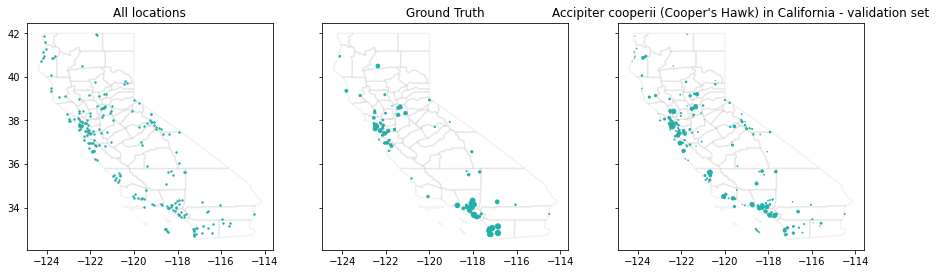

In [92]:
#California
ig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,15))
ax1.set_title('All locations')
ax2.set_title('Ground Truth')
ax3.set_title('Prediction')
#train_gdf.drop_duplicates(["geometry"]).boundary.plot(ax = ax, alpha = 0.4, edgecolor = "gray")
geoDatav[geoDatav["STATE"].isin(["06"])].boundary.plot(ax=ax1, alpha = 0.1, edgecolor = "gray" )

geoDatav[geoDatav["STATE"].isin(["06"])].boundary.plot(ax=ax2, alpha = 0.1, edgecolor = "gray" )

geoDatav[geoDatav["STATE"].isin(["06"])].boundary.plot(ax=ax3, alpha = 0.1, edgecolor = "gray" )

sub_cali = sub[sub["state_code"]=="US-CA"]
#sub_train = sub_cali[sub_cali["split"]=="train"]
sub_val = sub_cali[sub_cali["split"]=="val"]
#sub.plot(ax=ax,markersize= sub['Accipiter cooperii']*50)
#sub_train.plot(ax=ax1,markersize= sub_train['Accipiter cooperii']*70)
sub_val.plot(ax=ax1,markersize= 2, color="lightseagreen")
sub_val.plot(ax=ax2,markersize= sub_val['Accipiter cooperii pred']*70, color="lightseagreen")
#sub_train.plot(ax=ax2,markersize= sub_train['Accipiter cooperii pred']*70)
ss= sub_val['Accipiter cooperii'].copy()
ss[ss<1e-5]=0
sub_val.plot(ax=ax3,markersize= sub_val['Accipiter cooperii']*70, color="lightseagreen")
plt.title("Accipiter cooperii (Cooper's Hawk) in California - validation set")
plt.show()

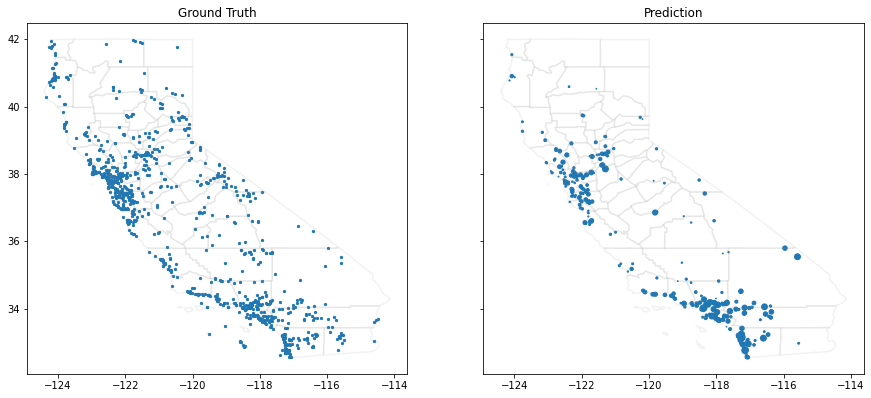

In [71]:
ig, (ax1, ax2,) = plt.subplots(1, 2, sharey=True, figsize=(15,20))
ax1.set_title('Ground Truth')
ax2.set_title('Prediction')
#train_gdf.drop_duplicates(["geometry"]).boundary.plot(ax = ax, alpha = 0.4, edgecolor = "gray")
geoDatav[geoDatav["STATE"].isin(["06"])].boundary.plot(ax=ax1, alpha = 0.1, edgecolor = "gray" )

geoDatav[geoDatav["STATE"].isin(["06"])].boundary.plot(ax=ax2, alpha = 0.1, edgecolor = "gray" )
sub_cali = sub[sub["state_code"]=="US-CA"]
sub_train = sub_cali[sub_cali["split"]=="train"]
sub_val = sub_cali[sub_cali["split"]=="val"]
#sub.plot(ax=ax,markersize= sub['Accipiter cooperii']*50)


sub_train.plot(ax=ax1,markersize= sub_train['Accipiter cooperii pred']*70)

sub_val.plot(ax=ax2,markersize= sub_val['Accipiter cooperii pred']*70, color="lightgreen")

plt.show()

/home/mila/t/tengmeli/.conda/envs/glc/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/home/mila/t/tengmeli/.conda/envs/glc/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/home/mila/t/tengmeli/.conda/envs/glc/lib/python3.6/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

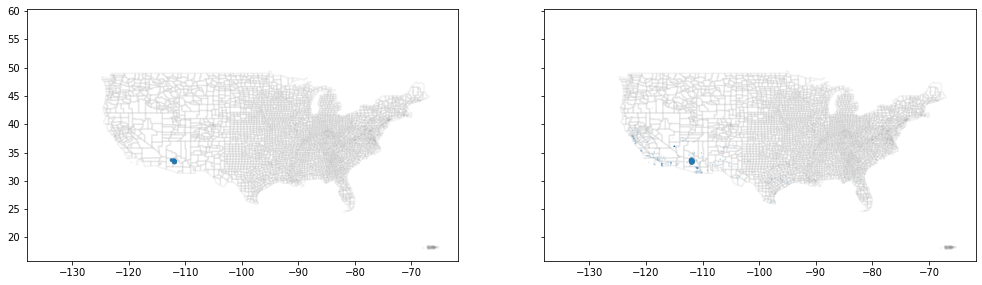

In [97]:
idx_species = 11
name_species = np.array(species)[non_songbird_idx][idx_species]

gdf[name_species] = ""
gdf[name_species + " pred"] = ""

path_gt = "/network/scratch/t/tengmeli/scratch/ecosystem-embedding/ebird_data_june/"

path_pred = "/network/projects/_groups/ecosystem-embeddings/ebird_checkpoints/resnet18_location_300_epochs/preds"

for index, row in gdf.iterrows():
    if row["split"] in ["train", "val"]:
        gdf[name_species + " pred"][index] = np.load(os.path.join(path_pred, gdf["hotspot_id"][index] + ".npy"))[idx_species]
        with open(os.path.join(path_gt, sub["hotspot_id"][index] + ".json")) as f:
            data=np.array(json.load(f)["probs"])[non_songbird_idx][idx_species]
        gdf[name_species][index] = data

sub= gdf[gdf["split"].isin(["train","val"])]

sub[name_species] = sub[name_species].astype(float)
sub[name_species + " pred"] = sub[name_species + " pred"].astype(float)

ig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(17,12))

#train_gdf.drop_duplicates(["geometry"]).boundary.plot(ax = ax, alpha = 0.4, edgecolor = "gray")
geoDatav[~geoDatav["STATE"].isin(["02", "15"])].boundary.plot(ax=ax1, alpha = 0.1, edgecolor = "gray" )

geoDatav[~geoDatav["STATE"].isin(["02", "15"])].boundary.plot(ax=ax2, alpha = 0.1, edgecolor = "gray" )

#sub.plot(ax=ax,markersize= sub['Accipiter cooperii']*50)
sub.plot(ax=ax1,markersize= sub[name_species]*70)
a = sub[name_species + " pred"].copy()
a[a <  10e-6] = 0
sub.plot(ax=ax2,markersize= a*70)
plt.show()

/home/mila/t/tengmeli/.conda/envs/glc/lib/python3.6/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


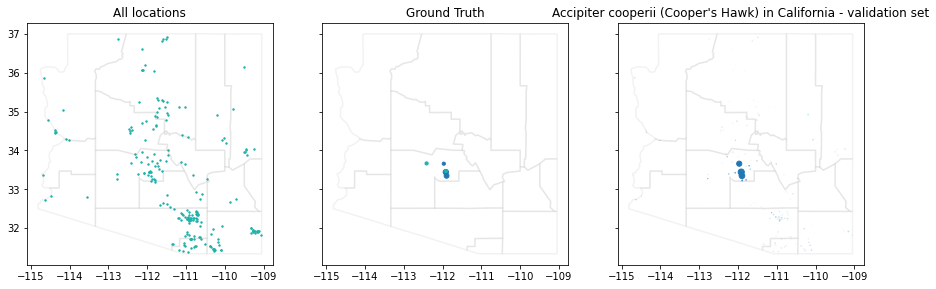

In [111]:
#Arizona
ig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,15))
ax1.set_title('All locations')
ax2.set_title('Ground Truth')
ax3.set_title('Prediction')
#train_gdf.drop_duplicates(["geometry"]).boundary.plot(ax = ax, alpha = 0.4, edgecolor = "gray")
geoDatav[geoDatav["STATE"].isin(["04"])].boundary.plot(ax=ax1, alpha = 0.1, edgecolor = "gray" )

geoDatav[geoDatav["STATE"].isin(["04"])].boundary.plot(ax=ax2, alpha = 0.1, edgecolor = "gray" )

geoDatav[geoDatav["STATE"].isin(["04"])].boundary.plot(ax=ax3, alpha = 0.1, edgecolor = "gray" )

sub_cali = sub[sub["state_code"]=="US-AZ"]
sub_train = sub_cali[sub_cali["split"]=="train"]
sub_val = sub_cali[sub_cali["split"]=="val"]

sub_val.plot(ax=ax1,markersize= 2, color="lightseagreen")
sub_train.plot(ax=ax1,markersize= 2, color="lightseagreen")

sub_train.plot(ax=ax2,markersize= sub_train[name_species ]*70)
sub_val.plot(ax=ax2,markersize= sub_val[name_species ]*70, color="lightseagreen")
             
sub_train.plot(ax=ax3,markersize= sub_train[name_species + " pred"]*70)
ss= sub_val.copy()
ss[ss[name_species + " pred"] < 1e-5][name_species + " pred"] = 0
sub_val.plot(ax=ax3,markersize= ss[name_species + " pred"]*70, color="lightseagreen")
plt.title("Accipiter cooperii (Cooper's Hawk) in California - validation set")
plt.show()

In [110]:
ss[ss[name_species + " pred"]<0.5]

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1 hotspot_id         lon  \
144          144           144             144    L245447 -110.872763   
217          217           217             217    L468284 -111.137524   
224            0             0               0          0    0.000000   
335          335           335             335    L818547 -110.194073   
663          663           663             663   L4540147 -112.152150   
758            0             0               0          0    0.000000   
766            0             0               0          0    0.000000   
950          950           950             950    L128889 -110.731102   
1121        1121          1121            1121    L281846 -110.793305   
1205           0             0               0          0    0.000000   
1374        1374          1374            1374    L382872 -112.448974   
1402        1402          1402            1402    L248042 -110.661678   
1409        1409          1409            1409   L2354669 -112.135348   
1490        1490          1490            1490   L3968747 -111.482071   
1555           0             0               0          0    0.000000   
2131        2131          2131            2131   L1583240 -110.374176   
2147        2147          2147            2147    L128878 -111.324285   
2848        2848          2848            2848    L554859 -111.756513   
2861        2861          2861            2861   L5044100 -111.791993   
2938        2938          2938            2938    L129024 -111.318298   
2977        2977          2977            2977    L323601 -110.067106   
2980        2980          2980            2980    L343450 -110.292400   
3168           0             0               0          0    0.000000   
3263        3263          3263            3263    L128977 -110.969918   
3810           0             0               0          0    0.000000   
4003        4003          4003            4003    L300609 -111.683087   
4011        4011          4011            4011   L4783817 -110.273811   
4400        4400          4400            4400    L821559 -111.630149   
4586        4586          4586            4586   L3642537 -109.144312   
4879           0             0               0          0    0.000000   
4979           0             0               0          0    0.000000   
5142        5142          5142            5142    L129114 -111.050665   
5264        5264          5264            5264   L5971101 -111.454978   
5346        5346          5346            5346   L1023602 -111.864522   
5368           0             0               0          0    0.000000   
5602           0             0               0          0    0.000000   
5712        5712          5712            5712   L6686511 -111.914849   
5763        5763          5763            5763   L1230549 -111.465054   
5858        5858          5858            5858    L275689 -110.754266   
5954        5954          5954            5954  L10231560 -111.363728   
6116        6116          6116            6116    L616744 -112.412195   
6150        6150          6150            6150   L1542515 -110.814539   
6172        6172          6172            6172    L351162 -109.238206   
6192        6192          6192            6192    L129030 -110.272335   
6207        6207          6207            6207    L129062 -110.309596   
6390        6390          6390            6390   L2499549 -111.762140   
6424           0             0               0          0    0.000000   
6527           0             0               0          0    0.000000   
6649        6649          6649            6649   L1920255 -111.518805   
6995           0             0               0          0    0.000000   
7491        7491          7491            7491    L284132 -111.081333   
7715        7715          7715            7715    L697052 -112.001034   
7796           0             0               0          0    0.000000   
7971        7971          7971            7971    L250145 -110.9

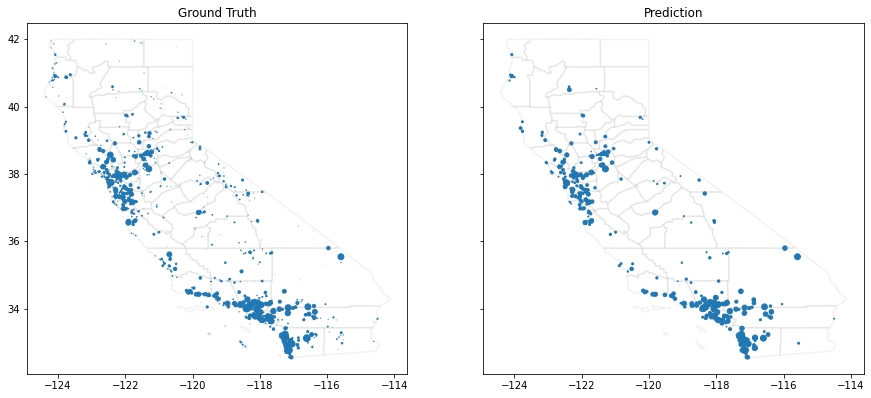

In [60]:
#California
ig, (ax1, ax2,) = plt.subplots(1, 2, sharey=True, figsize=(15,15))
ax1.set_title('Ground Truth')
ax2.set_title('Prediction')
#train_gdf.drop_duplicates(["geometry"]).boundary.plot(ax = ax, alpha = 0.4, edgecolor = "gray")
geoDatav[geoDatav["STATE"].isin(["06"])].boundary.plot(ax=ax1, alpha = 0.1, edgecolor = "gray" )

geoDatav[geoDatav["STATE"].isin(["06"])].boundary.plot(ax=ax2, alpha = 0.1, edgecolor = "gray" )

#sub.plot(ax=ax,markersize= sub['Accipiter cooperii']*50)
sub[sub["state_code"]=="US-CA"].plot(ax=ax1,markersize= sub[sub["state_code"]=="US-CA"]['Accipiter cooperii']*70)
a = sub[sub["state_code"]=="US-CA"]['Accipiter cooperii pred'].copy()
#a[a <  10e-6] = 0
sub[sub["state_code"]=="US-CA"].plot(ax=ax2,markersize= a*70)
plt.show()

In [ ]:
#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

In [3]:
state = "US-CA"

In [4]:
subset = df[df["state_code"]==state]

In [145]:
len(subset)

1062

In [146]:
import glob
import os
import json 
import pandas as pd

datapath = "/network/scratch/t/tengmeli/ecosystem-embedding/satellite_data/"
species_data = "/network/scratch/t/tengmeli/ecosystem-embedding/ebird_data_june/"

#path of csv where we want to save info 
save_path = "/network/scratch/t/tengmeli/ecosystem-embedding/validation_files/california.csv"

keys = [os.path.basename(a).strip(".json") for a in glob.glob(species_data + "/*")]

hs_list = subset.hotspot_id.values

hs_list = list(dict.fromkeys(hs_list))
hs_list = [hs for hs in hs_list if hs in keys]

rgb_paths = [os.path.join(datapath, f"{hs}_rgb.npy") for hs in hs_list]
json_paths = [os.path.join(datapath, f"{hs}.json") for hs in hs_list]
nir_paths = [os.path.join(datapath, f"{hs}_ni.npy") for hs in hs_list]
r_paths = [os.path.join(datapath, f"{hs}_r.npy") for hs in hs_list]
g_paths = [os.path.join(datapath, f"{hs}_g.npy") for hs in hs_list]
b_paths = [os.path.join(datapath, f"{hs}_b.npy") for hs in hs_list]

species = [os.path.join(species_data, f"{hs}.json") for hs in hs_list]


dataset = pd.DataFrame(list(zip(hs_list, r_paths, g_paths, b_paths,nir_paths, json_paths, rgb_paths,
                                species,
                                )),

              columns=["hotspot", "r", "g", "b","nir", "meta", "rgb","species"])


dataset.to_csv(save_path)

In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

%matplotlib inline

In [6]:
path = "/network/scratch/t/tengmeli/ecosystem-embedding/validation_files/california.csv"

In [149]:
from omegaconf import OmegaConf, DictConfig
from src.trainer.trainer import EbirdTask, EbirdDataModule
import pytorch_lightning as pl
from pytorch_lightning import loggers as pl_loggers
from pytorch_lightning import Trainer
from pytorch_lightning.loggers import CometLogger
from pytorch_lightning.callbacks import EarlyStopping, ModelCheckpoint, LearningRateMonitor
from typing import Any, Dict, Tuple, Type, cast
from src.dataset.utils import set_data_paths
import pdb
import torch.nn as nn
from PIL import Image
import torch

In [150]:

conf = OmegaConf.load("/home/mila/t/tengmeli/ecosystem-embedding/configs/defaults.yaml")
config_fn = "/home/mila/t/tengmeli/ecosystem-embedding/configs/california.yaml"

if os.path.isfile(config_fn):
    user_conf = OmegaConf.load(config_fn)
    conf = OmegaConf.merge(conf, user_conf)
else:
    raise FileNotFoundError(f"config_file={config_fn} is not a valid file")

conf = set_data_paths(conf)
conf = cast(DictConfig, conf)  # convince mypy that everything is alright


In [151]:
def get_meta(df, index):
    meta = load_file(get_path(df, index, "meta"))
    return(meta)

def get_img(df, index):
    band_npy = load_file(get_path(df, index, "rgb"))
    return (band_npy)

def get_img(df, index, new_width = 256, new_height = 256):
    band_npy = load_file(get_path(df, index, "rgb"))
   
    im = Image.fromarray(np.transpose(band_npy, (1,2,0)))
    width, height = im.size   # Get dimensions

    left = (width - new_width)/2
    top = (height - new_height)/2
    right = (width + new_width)/2
    bottom = (height + new_height)/2

    # Crop the center of the image
    im = im.crop((left, top, right, bottom))
    return(im)

In [152]:
task = EbirdTask(conf)
datamodule = EbirdDataModule(conf)
trainer_args = cast(Dict[str, Any], OmegaConf.to_object(conf.trainer))

Training with BCE Loss


In [153]:
PATH = "/home/mila/t/tengmeli/ecosystem-embedding/ckpt/songbird_resnet18/last.ckpt"

state_dict = torch.load(PATH)["state_dict"]

for key in list(state_dict.keys()):
    state_dict[key.replace('model.', '')] = state_dict.pop(key)


task.model.load_state_dict(state_dict)
task.model.eval()
m = nn.Sigmoid()

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [154]:
def infer(batch, model):
    x = batch['sat'].squeeze(1).to(device)
    y = batch['target'].to(device)
    y_hat = model(x)
    pred = m(y_hat)
    return(pred)

datamodule.setup()
test_dataloader = datamodule.val_dataloader()

/home/mila/t/tengmeli/.conda/envs/ebird-env/lib/python3.6/site-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [155]:
subset

Unnamed: 0 hotspot_id         lon        lat       county county_code  \
19            19   L2240252 -120.433674  39.832260       Plumas   US-CA-063   
31            31    L373858 -124.227980  40.645220     Humboldt   US-CA-023   
33            33   L1764908 -121.961481  37.433465  Santa Clara   US-CA-085   
44            44   L9946491 -121.225700  38.678348   Sacramento   US-CA-067   
46            46    L278588 -116.309793  33.836986    Riverside   US-CA-065   
...          ...        ...         ...        ...          ...         ...   
8625        8625    L917353 -117.690064  34.214065  Los Angeles   US-CA-037   
8627        8627    L791595 -121.155167  40.223976       Plumas   US-CA-063   
8630        8630    L589444 -119.862385  37.795542     Tuolumne   US-CA-109   
8633        8633   L2146581 -123.084710  39.002042    Mendocino   US-CA-045   
8636        8636    L522347 -121.765240  36.572932     Monterey   US-CA-053   

           state state_code  june_complete_checklists  num_checklists  \
19    California      US-CA                        16             248   
31    California      US-CA                         7             199   
33    California      US-CA                        33            1176   
44    California      US-CA                        42             850   
46    California      US-CA                        91            2618   
...          ...        ...                       ...             ...   
8625  California      US-CA                         9             119   
8627  California      US-CA                        18             209   
8630  California      US-CA                       110             408   
8633  California      US-CA                       141            3013   
8636  California      US-CA                        10             251   

      num_complete_checklists  num_different_species  
19                        211                    147  
31                        177                    127  
33                        974                    179  
44                        830                    110  
46                       2288                    176  
...                       ...                    ...  
8625                      116                     93  
8627                      158                    192  
8630                      318                    133  
8633                     2327                    218  
8636                      193                    150  

[1062 rows x 12 columns]

In [156]:
idx = 3

In [157]:
subset["ground_truth"] = ""
subset["pred"] = ""

/home/mila/t/tengmeli/.conda/envs/ebird-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/mila/t/tengmeli/.conda/envs/ebird-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [158]:
preds = []
hs= []
for batch in test_dataloader:
    pred = infer(batch, task.model)
    for n, i in enumerate(pred):
        row = subset[subset["hotspot_id"] == batch["hotspot_id"][n]].index.item()

        subset.loc[row,"pred"] = i[idx].item()
        subset.loc[row,"ground_truth"] =  batch["original_target"][n][idx].item()
        

/home/mila/t/tengmeli/.conda/envs/ebird-env/lib/python3.6/site-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/home/mila/t/tengmeli/.conda/envs/ebird-env/lib/python3.6/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [170]:
subset = subset[subset["ground_truth"]!='']

In [171]:
subset.to_csv("./california_pred.csv")

In [172]:
subset.head()

Unnamed: 0 hotspot_id         lon        lat       county county_code  \
19          19   L2240252 -120.433674  39.832260       Plumas   US-CA-063   
31          31    L373858 -124.227980  40.645220     Humboldt   US-CA-023   
33          33   L1764908 -121.961481  37.433465  Santa Clara   US-CA-085   
44          44   L9946491 -121.225700  38.678348   Sacramento   US-CA-067   
46          46    L278588 -116.309793  33.836986    Riverside   US-CA-065   

         state state_code  june_complete_checklists  num_checklists  \
19  California      US-CA                        16             248   
31  California      US-CA                         7             199   
33  California      US-CA                        33            1176   
44  California      US-CA                        42             850   
46  California      US-CA                        91            2618   

    num_complete_checklists  num_different_species ground_truth      pred  
19                      211                    147         0.75  0.272362  
31                      177                    127     0.714286  0.913363  
33                      974                    179     0.212121  0.794723  
44                      830                    110            0  0.323251  
46                     2288                    176            0  0.448659

In [173]:
ny = gpd.read_file(gpd.datasets.get_path('nybb'))


In [174]:
ny

BoroCode       BoroName     Shape_Leng    Shape_Area  \
0         5  Staten Island  330470.010332  1.623820e+09   
1         4         Queens  896344.047763  3.045213e+09   
2         3       Brooklyn  741080.523166  1.937479e+09   
3         1      Manhattan  359299.096471  6.364715e+08   
4         2          Bronx  464392.991824  1.186925e+09   

                                            geometry  
0  MULTIPOLYGON (((970217.022 145643.332, 970227....  
1  MULTIPOLYGON (((1029606.077 156073.814, 102957...  
2  MULTIPOLYGON (((1021176.479 151374.797, 102100...  
3  MULTIPOLYGON (((981219.056 188655.316, 980940....  
4  MULTIPOLYGON (((1012821.806 229228.265, 101278...

In [175]:
ny = ny.to_crs(epsg=4326)

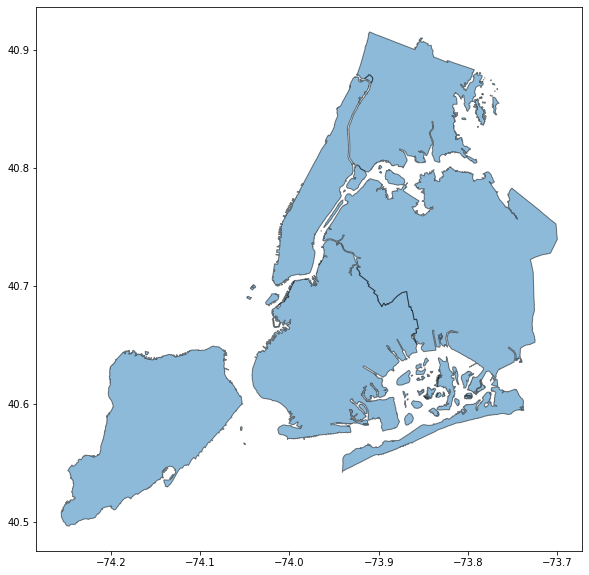

In [176]:
ax = ny.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

In [177]:
subset["county"].unique()

array(['Plumas', 'Humboldt', 'Santa Clara', 'Sacramento', 'Riverside',
       'Kern', 'Alameda', 'San Mateo', 'Los Angeles', 'San Bernardino',
       'Kings', 'Yolo', 'Mono', 'San Diego', 'Santa Barbara', 'Marin',
       'Alpine', 'Orange', 'San Luis Obispo', 'Nevada', 'Sonoma',
       'Monterey', 'Santa Cruz', 'Stanislaus', 'Madera', 'Del Norte',
       'San Francisco', 'Contra Costa', 'Inyo', 'Mendocino', 'Siskiyou',
       'Imperial', 'El Dorado', 'Ventura', 'San Joaquin', 'Butte', 'Lake',
       'Shasta', 'Fresno', 'Lassen', 'Amador', 'Placer', 'Solano', 'Napa',
       'Mariposa', 'San Benito', 'Sierra', 'Yuba', 'Tulare', 'Tuolumne',
       'Calaveras', 'Tehama', 'Modoc', 'Merced', 'Glenn', 'Colusa',
       'Sutter'], dtype=object)

In [178]:
subset_ny = subset[subset["county"].isin(['New York', 'Bronx', 'Queens'])]

In [197]:
a = (255*subset["ground_truth"].values).astype(np.uint8)
b = (255*subset["pred"].values).astype(np.uint8)

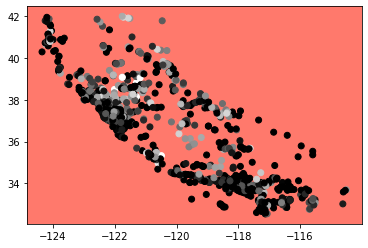

In [199]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.set_facecolor('xkcd:salmon')
plt.scatter(x=subset["lon"], y=subset["lat"],  c = a)
plt.gray()

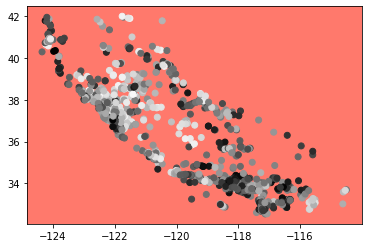

In [200]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.set_facecolor('xkcd:salmon')
plt.scatter(x=subset["lon"], y=subset["lat"],  c = b)
plt.gray()

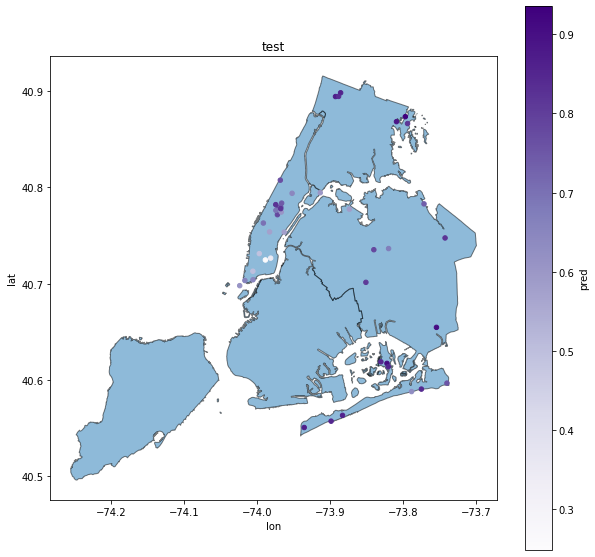

In [53]:
ax = ny.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

subset_ny.plot(x="lon", y="lat", kind="scatter", c = "pred", colormap="Purples", 
        title="test", 
        ax=ax)
plt.show()

In [22]:
ny.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich